# Data Overview

https://github.com/Bharanish/M5/blob/50e7ee4f65363b29c614bfaf548782c9119c23b0/M5_EDA.ipynb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates as mat_dates
from matplotlib.ticker import FuncFormatter, PercentFormatter
import math
pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
#Reading the data from files
calendar_df = pd.read_csv('data/calendar.csv')
sales_df = pd.read_csv('data/sales_train_validation.csv')
prices_df = pd.read_csv('data/sell_prices.csv')

In [4]:
print('shape of calendar_df is ',calendar_df.shape)
print('top 2 rows of calendar_df')
calendar_df.head(2)

shape of calendar_df is  (1969, 14)
top 2 rows of calendar_df


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0


In [5]:
print('shape of sales_df is ',sales_df.shape)
print('top 2 rows of sales_df')
sales_df.head(2)

shape of sales_df is  (30490, 1919)
top 2 rows of sales_df


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
print('shape of prices_df is ',prices_df.shape)
print('top 2 rows of prices_df')
prices_df.head(2)

shape of prices_df is  (6841121, 4)
top 2 rows of prices_df


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58


In [7]:
states = len(sales_df['state_id'].unique())
stores = len(sales_df['store_id'].unique())
item_cat = len(sales_df['cat_id'].unique())
depts = len(sales_df['dept_id'].unique())
items = len(sales_df['item_id'].unique())
f'The data comprises for {states} States, {stores} Stores, {item_cat} Item Categories, {depts} Departments, {items} Items'

'The data comprises for 3 States, 10 Stores, 3 Item Categories, 7 Departments, 3049 Items'

# 3. Exploratory Data Analysis
## What is the pattern of overall sales across all states and stores on daily basis?

**Observations**  
1.There is a slight upward trend in total sales from 2011 to 2016  

2.The sales pattern is same in each year and on 1st Jan of every year we observe zero sales (may be the stores are closed on New year Eve)  



# What is the pattern of total sales for each year separately?

# What is the Weekly Seasonality of total sales across all stores?

# What is proportion of Sales across the states?

In [8]:
""" Here we get sales Proportion from each state"""
sales_st_grp = sales_df.groupby('state_id')
sales_st_grp_idx = list(sales_st_grp.groups.values())
sales_st_grp_idx

[Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             12186, 12187, 12188, 12189, 12190, 12191, 12192, 12193, 12194,
             12195],
            dtype='int64', length=12196),
 Int64Index([12196, 12197, 12198, 12199, 12200, 12201, 12202, 12203, 12204,
             12205,
             ...
             21333, 21334, 21335, 21336, 21337, 21338, 21339, 21340, 21341,
             21342],
            dtype='int64', length=9147),
 Int64Index([21343, 21344, 21345, 21346, 21347, 21348, 21349, 21350, 21351,
             21352,
             ...
             30480, 30481, 30482, 30483, 30484, 30485, 30486, 30487, 30488,
             30489],
            dtype='int64', length=9147)]

In [9]:
#按照states被分成了三组
sales_st_grp.groups

{'CA': Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             12186, 12187, 12188, 12189, 12190, 12191, 12192, 12193, 12194,
             12195],
            dtype='int64', length=12196),
 'TX': Int64Index([12196, 12197, 12198, 12199, 12200, 12201, 12202, 12203, 12204,
             12205,
             ...
             21333, 21334, 21335, 21336, 21337, 21338, 21339, 21340, 21341,
             21342],
            dtype='int64', length=9147),
 'WI': Int64Index([21343, 21344, 21345, 21346, 21347, 21348, 21349, 21350, 21351,
             21352,
             ...
             30480, 30481, 30482, 30483, 30484, 30485, 30486, 30487, 30488,
             30489],
            dtype='int64', length=9147)}

In [10]:
#取属于CA的索引行
sales_st_grp_idx[0]

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            12186, 12187, 12188, 12189, 12190, 12191, 12192, 12193, 12194,
            12195],
           dtype='int64', length=12196)

In [11]:
#CA
CA_sales_df = sales_df.iloc[sales_st_grp_idx[0]]
CA_sales_df

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12191,FOODS_3_823_CA_4_validation,FOODS_3_823,FOODS_3,FOODS,CA_4,CA,1,1,1,4,...,3,1,2,2,0,1,1,3,3,0
12192,FOODS_3_824_CA_4_validation,FOODS_3_824,FOODS_3,FOODS,CA_4,CA,0,0,0,1,...,0,1,1,1,0,2,0,0,0,1
12193,FOODS_3_825_CA_4_validation,FOODS_3_825,FOODS_3,FOODS,CA_4,CA,2,3,2,1,...,0,2,0,1,3,1,1,0,2,0
12194,FOODS_3_826_CA_4_validation,FOODS_3_826,FOODS_3,FOODS,CA_4,CA,0,0,0,0,...,1,2,2,1,4,5,1,7,0,4


In [12]:
CA_sales_df.loc[:,'d_1':'d_1913'].aggregate(['sum'])

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
sum,14195,13805,10108,11047,9925,11322,12251,16610,14696,11822,...,16255,20564,23032,17052,15784,15148,14488,17095,21834,23187


In [13]:
CA_sales_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T

,sum
d_1,14195
d_2,13805
d_3,10108
d_4,11047
d_5,9925
...,...
d_1909,15148
d_1910,14488
d_1911,17095
d_1912,21834


In [14]:
CA_sales_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum()

sum    28675547
dtype: int64

In [15]:
CA_total_sales = int(CA_sales_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values)
CA_total_sales

28675547

In [16]:
#以此类推 获得各地区的所有天数的总销量
TX_sales_df = sales_df.iloc[sales_st_grp_idx[1]]
TX_total_sales = int(TX_sales_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values)
WI_sales_df = sales_df.iloc[sales_st_grp_idx[2]]
WI_total_sales = int(WI_sales_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values)

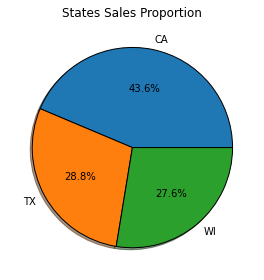

In [17]:
"""plot of sales Proportion from each state"""
states_overallSales = [CA_total_sales,TX_total_sales,WI_total_sales]
states = ['CA','TX','WI']
plt.pie(states_overallSales,labels=states,shadow=True,
        autopct = '%1.1f%%', wedgeprops={'edgecolor':'black'})
plt.title('States Sales Proportion')
plt.tight_layout()
plt.show()

# What is proportion of sales across stores?

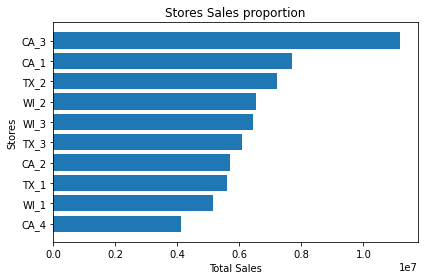

In [18]:
""" Here we get sales Proportion from each store """
sales_store_grp = sales_df.groupby('store_id')
sales_store_grp_idx = list(sales_store_grp.groups.values())
stores_ky = list(sales_store_grp.groups.keys())
stores = []
store_sales = []
for i in range(len(stores_ky)):
    stores.append(stores_ky[i])
    store_df = sales_df.iloc[sales_store_grp_idx[i]]
    store_sales.append(int(store_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values))

"""plot of sales Proportion from each store"""
stores = list(np.asarray(stores)[np.argsort(np.asarray(store_sales))])
store_sales = list(np.asarray(store_sales)[np.argsort(np.asarray(store_sales))])
plt.barh(stores,store_sales)
plt.title('Stores Sales proportion')
plt.xlabel('Total Sales')
plt.ylabel('Stores')
plt.tight_layout()
plt.show()

# What is the portional of total sales from each product category?

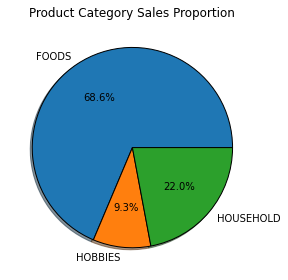

In [19]:
""" Here we get sales Proportion from each product category """
sales_cat_grp = sales_df.groupby('cat_id')
sales_cat_grp_idx = list(sales_cat_grp.groups.values())
cat_ky = list(sales_cat_grp.groups.keys())
prod_cats = []
prod_cats_sales = []
for i in range(len(cat_ky)):
    prod_cats.append(cat_ky[i])
    cat_df = sales_df.iloc[sales_cat_grp_idx[i]]
    prod_cats_sales.append(int(cat_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values))

"""plot of sales Proportion from each product category"""
plt.pie(prod_cats_sales,labels=prod_cats,shadow=True,
        autopct = '%1.1f%%', wedgeprops={'edgecolor':'black'})
plt.title('Product Category Sales Proportion')
plt.tight_layout()
plt.show()

# What is proportion of total sales from each department?


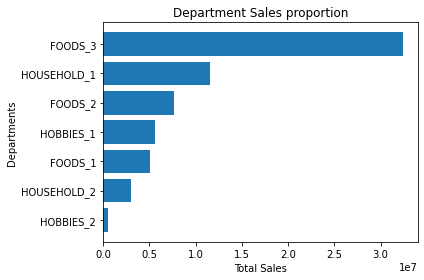

In [20]:
""" Here we get sales Proportion from each department """
sales_dpt_grp = sales_df.groupby('dept_id')
sales_dpt_grp_idx = list(sales_dpt_grp.groups.values())
dept_ky = list(sales_dpt_grp.groups.keys())
depts = []
dept_sales = []
for i in range(len(dept_ky)):
    depts.append(dept_ky[i])
    dept_df = sales_df.iloc[sales_dpt_grp_idx[i]]
    dept_sales.append(int(dept_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values))

"""plot of sales Proportion from each department"""
depts = list(np.asarray(depts)[np.argsort(np.asarray(dept_sales))])
dept_sales = list(np.asarray(dept_sales)[np.argsort(np.asarray(dept_sales))])
plt.barh(depts,dept_sales)
plt.title('Department Sales proportion')
plt.xlabel('Total Sales')
plt.ylabel('Departments')
plt.tight_layout()
plt.show()

# Sates Vs Product category sales proportion


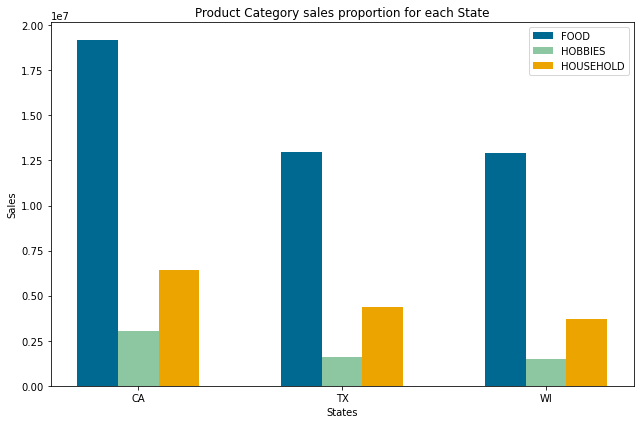

In [21]:
"""Here we get sales proportion of each product category for each state """
sales_state_cat_grp = sales_df.groupby(['state_id','cat_id'])
sales_state_cat_grp_idx = list(sales_state_cat_grp.groups.values())
state_cat_ky = list(sales_state_cat_grp.groups.keys())
states = []
food_cat_sales = []
hobbies_cat_sales = []
household_cat_sales = []
for i in range(len(state_cat_ky)):
    if state_cat_ky[i][0] not in states:
        states.append(state_cat_ky[i][0])
    state_cat_df = sales_df.iloc[sales_state_cat_grp_idx[i]]
    if i%3 == 0:
        food_cat_sales.append(int(state_cat_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values))
    elif i%3 == 1:
        hobbies_cat_sales.append(int(state_cat_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values))
    else:
        household_cat_sales.append(int(state_cat_df.loc[:,'d_1':'d_1913'].aggregate(['sum']).T.sum().values))


"""plot of sales proportion of each product category for each state """
x_idx = np.arange(len(states))
width = 0.2
plt.figure(figsize=(9,6))
plt.bar(x_idx - width, food_cat_sales,  width = width, color="#006992", label="FOOD")
plt.bar(x_idx, hobbies_cat_sales, width = width, color="#8cc7a1", label="HOBBIES")
plt.bar(x_idx + width, household_cat_sales,  width = width, color="#ECA400", label="HOUSEHOLD")

plt.legend()
plt.xticks(ticks=x_idx, labels=states)
plt.title("Product Category sales proportion for each State")
plt.xlabel("States")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

# SNAP Vs Non-SNAP day Sales proportion on each product category


In [22]:
"""Group by cat_id for the sales proportion of each product category wrt SNAP Vs Non-SNAP days"""
snap_cat_sales = {}
i=0
sales_cat_grp_df = sales_df.iloc[sales_cat_grp_idx[i]].loc[:,'d_1':'d_1913']
sales_cat_grp_df = pd.melt(sales_cat_grp_df,var_name='d',value_name='sales')
sales_cat_grp_df = sales_cat_grp_df.merge(calendar_df,on='d',how='left')
sales_cat_grp_df

,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,d_1,3,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
4,d_1,3,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27489805,d_1913,1,2016-04-24,11613,Sunday,2,4,2016,NaN,NaN,NaN,NaN,0,0,0
27489806,d_1913,0,2016-04-24,11613,Sunday,2,4,2016,NaN,NaN,NaN,NaN,0,0,0
27489807,d_1913,0,2016-04-24,11613,Sunday,2,4,2016,NaN,NaN,NaN,NaN,0,0,0
27489808,d_1913,3,2016-04-24,11613,Sunday,2,4,2016,NaN,NaN,NaN,NaN,0,0,0


In [23]:
snap_cat_sales[cat_ky[i]] = {}
snap_cat_sales[cat_ky[i]]['Total_Sales'] = int(sales_cat_grp_df[['sales']].sum().values)
snap_cat_sales[cat_ky[i]]['SNAP_Sales'] = int(sales_cat_grp_df[(sales_cat_grp_df['snap_CA'] == 1) |(sales_cat_grp_df['snap_TX'] == 1)|(sales_cat_grp_df['snap_WI'] == 1)]['sales'].sum())
snap_cat_sales

{'FOODS': {'Total_Sales': 45089939, 'SNAP_Sales': 23838159}}

In [24]:
for i in range(len(cat_ky)):
    sales_cat_grp_df = sales_df.iloc[sales_cat_grp_idx[i]].loc[:,'d_1':'d_1913']
    sales_cat_grp_df = pd.melt(sales_cat_grp_df,var_name='d',value_name='sales')
    sales_cat_grp_df = sales_cat_grp_df.merge(calendar_df,on='d',how='left')
    snap_cat_sales[cat_ky[i]] = {}
    snap_cat_sales[cat_ky[i]]['Total_Sales'] = int(sales_cat_grp_df[['sales']].sum().values)
    snap_cat_sales[cat_ky[i]]['SNAP_Sales'] = int(sales_cat_grp_df[(sales_cat_grp_df['snap_CA'] == 1) |(sales_cat_grp_df['snap_TX'] == 1)|(sales_cat_grp_df['snap_WI'] == 1)]['sales'].sum())

 

In [25]:
cat_ky

['FOODS', 'HOBBIES', 'HOUSEHOLD']

In [26]:
snap_cat_sales

{'FOODS': {'Total_Sales': 45089939, 'SNAP_Sales': 23838159},
 'HOBBIES': {'Total_Sales': 6124800, 'SNAP_Sales': 3059566},
 'HOUSEHOLD': {'Total_Sales': 14480670, 'SNAP_Sales': 7285350}}

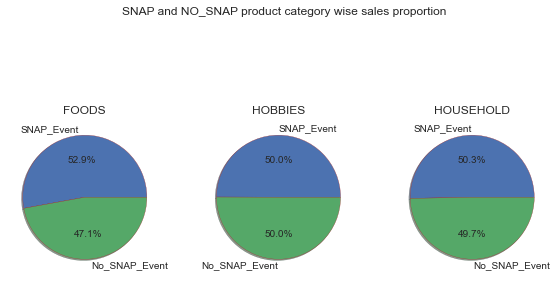

In [27]:
   """Plot of  sales proportion of each product category wrt SNAP Vs Non-SNAP days"""

plt.style.use('seaborn')
labels = ['SNAP_Event', 'No_SNAP_Event']
snap_cat_sales_ky = list(snap_cat_sales.keys())
FOODS_sales = [snap_cat_sales['FOODS']['SNAP_Sales'], snap_cat_sales['FOODS']['Total_Sales'] - snap_cat_sales['FOODS']['SNAP_Sales']]
HOBBIES_sales = [snap_cat_sales['HOBBIES']['SNAP_Sales'], snap_cat_sales['HOBBIES']['Total_Sales'] - snap_cat_sales['HOBBIES']['SNAP_Sales']]
HOUSEHOLD_sales = [snap_cat_sales['HOUSEHOLD']['SNAP_Sales'], snap_cat_sales['HOUSEHOLD']['Total_Sales'] - snap_cat_sales['HOUSEHOLD']['SNAP_Sales']]

fig, (ax1,ax2,ax3) = plt.subplots(1, 3)

fig.suptitle('SNAP and NO_SNAP product category wise sales proportion')

ax1.pie(FOODS_sales,labels = labels, shadow=True,
        autopct = '%1.1f%%',wedgeprops={'edgecolor':'brown'})
ax1.set_title(snap_cat_sales_ky[0])

ax2.pie(HOBBIES_sales,labels = labels, shadow=True,
        autopct = '%1.1f%%',wedgeprops={'edgecolor':'brown'})
ax2.set_title(snap_cat_sales_ky[1])

ax3.pie(HOUSEHOLD_sales,labels = labels, shadow=True,
        autopct = '%1.1f%%',wedgeprops={'edgecolor':'brown'})
ax3.set_title(snap_cat_sales_ky[2])

plt.tight_layout()
plt.show()


# SNAP Vs Non-SNAP day Sales proportion on each state

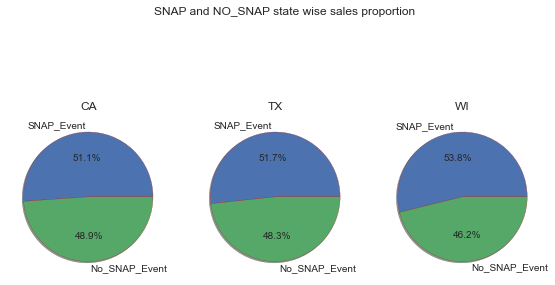

In [28]:
"""Group by state_id for the sales proportion of each state wrt SNAP Vs Non-SNAP days"""

state_ky = list(sales_st_grp.groups.keys())
snap_state_sales = {}
for i in range(len(state_ky)):
    sales_state_grp_df = sales_df.iloc[sales_st_grp_idx[i]].loc[:,'d_1':'d_1913']
    sales_state_grp_df = pd.melt(sales_state_grp_df,var_name='d',value_name='sales')
    sales_state_grp_df = sales_state_grp_df.merge(calendar_df,on='d',how='left')
    snap_state_sales[state_ky[i]] = {}
    snap_state_sales[state_ky[i]]['Total_Sales'] = int(sales_state_grp_df[['sales']].sum().values)
    snap_state_sales[state_ky[i]]['SNAP_Sales'] = int(sales_state_grp_df[(sales_state_grp_df['snap_CA'] == 1) |(sales_state_grp_df['snap_TX'] == 1)|(sales_state_grp_df['snap_WI'] == 1)]['sales'].sum())

"""Plot of sales proportion of each state wrt SNAP Vs Non-SNAP days"""

labels = ['SNAP_Event', 'No_SNAP_Event']
snap_state_sales_ky = list(snap_state_sales.keys())
CA_sales = [snap_state_sales['CA']['SNAP_Sales'], snap_state_sales['CA']['Total_Sales'] - snap_state_sales['CA']['SNAP_Sales']]
TX_sales = [snap_state_sales['TX']['SNAP_Sales'], snap_state_sales['TX']['Total_Sales'] - snap_state_sales['TX']['SNAP_Sales']]
WI_sales = [snap_state_sales['WI']['SNAP_Sales'], snap_state_sales['WI']['Total_Sales'] - snap_state_sales['WI']['SNAP_Sales']]

fig, (ax1,ax2,ax3) = plt.subplots(1, 3)

fig.suptitle('SNAP and NO_SNAP state wise sales proportion')

ax1.pie(CA_sales,labels = labels, shadow=True,
        autopct = '%1.1f%%',wedgeprops={'edgecolor':'brown'})
ax1.set_title(snap_state_sales_ky[0])

ax2.pie(TX_sales,labels = labels, shadow=True,
        autopct = '%1.1f%%',wedgeprops={'edgecolor':'brown'})
ax2.set_title(snap_state_sales_ky[1])

ax3.pie(WI_sales,labels = labels, shadow=True,
        autopct = '%1.1f%%',wedgeprops={'edgecolor':'brown'})
ax3.set_title(snap_state_sales_ky[2])

plt.tight_layout()
plt.show()

# Number of days with events and with no events

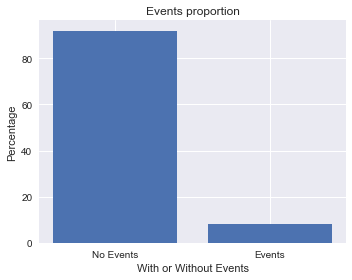

In [29]:
"""Here we get number of days with and without events and plot the distribution"""
df = calendar_df[['event_name_1']]
no_event_per = ((len(df) - int(df.count()))/len(df))*100
event_per = (int(df.count())/len(df))*100
event_lst = [('No Events',no_event_per),('Events',event_per)]
events = [x[0] for x in event_lst]
events_count = [x[1] for x in event_lst]

plt.figure(figsize=(5,4))
plt.bar(events,events_count)
plt.title('Events proportion')
plt.xlabel('With or Without Events')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

# Events types proportion

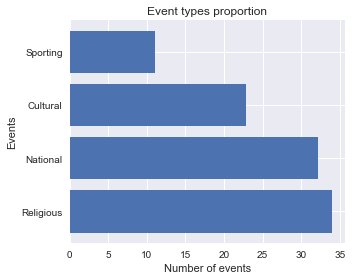

In [30]:
events_type=list(calendar_df.event_type_1.unique())
events_type.pop(0)
events_lst=[]
df = calendar_df[['event_type_1']].dropna()
for i in events_type:
    df_i=df[df['event_type_1']==i]
    i_per=(len(df_i)/len(df))*100
    t=(i,i_per)
    events_lst.append(t)
    
events = [x[0] for x in events_lst]
events.reverse()
events_count = [x[1] for x in events_lst]
events_count.reverse()

plt.figure(figsize=(5,4))
plt.barh(events,events_count)
plt.title('Event types proportion')
plt.xlabel('Number of events')
plt.ylabel('Events')
plt.tight_layout()
plt.show()

# Sales Vs year and product category

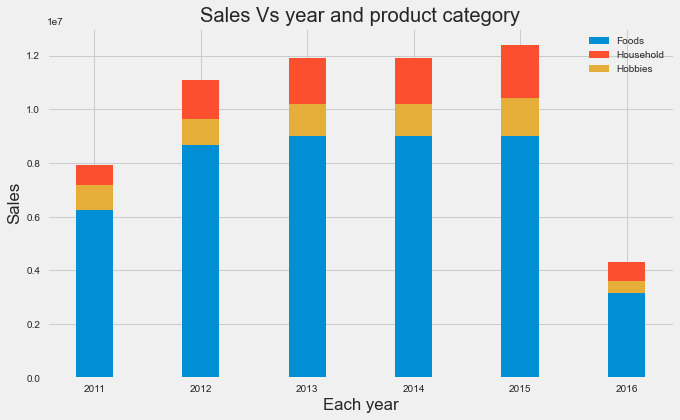

In [31]:
"""Here we get sales proportion of each product category for each year """
sales_cat = {}
sales_cat_grp = sales_df.groupby('cat_id')
sales_cat_grp_idx = list(sales_cat_grp.groups.values())
cat_ky = list(sales_cat_grp.groups.keys())
for i in range(len(cat_ky)):
    sales_cat_df = pd.melt(sales_df.iloc[sales_cat_grp_idx[i]].loc[:,'d_1':'d_1913'],var_name='d',value_name='sales').merge(calendar_df,on='d',how='left')
    sales_cat_yr_grp = sales_cat_df.groupby('year').groups
    sales_cat_yr_idx = list(sales_cat_yr_grp.values())
    sales_cat_yr_ky = list(sales_cat_yr_grp.keys())
    sales_cat[cat_ky[i]] = {}
    for j in range(len(sales_cat_yr_ky)):
        sales_cat[cat_ky[i]][sales_cat_yr_ky[j]] = sales_cat_df.iloc[sales_cat_yr_idx[j]]['sales'].sum()

"""plot of the sales proportion of each product category for each year """

#https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html
N = 6
FOODS_sales = list(sales_cat['FOODS'].values())
HOBBIES_sales = list(sales_cat['HOBBIES'].values())
HOUSEHOLD_sales = list(sales_cat['HOUSEHOLD'].values())

ind = np.arange(N)    
width = 0.35   

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
p1 = plt.bar(ind, FOODS_sales, width)
p2 = plt.bar(ind, HOUSEHOLD_sales, width,bottom=FOODS_sales)
p3 = plt.bar(ind, HOBBIES_sales, width,bottom=FOODS_sales)

plt.xlabel('Each year')
plt.ylabel('Sales')
plt.title('Sales Vs year and product category')
plt.xticks(ind, (2011, 2012, 2013, 2014, 2015, 2016))
plt.legend((p1[0], p2[0], p3[0]), ('Foods', 'Household','Hobbies'))

plt.show()


# Daily total sales per item category

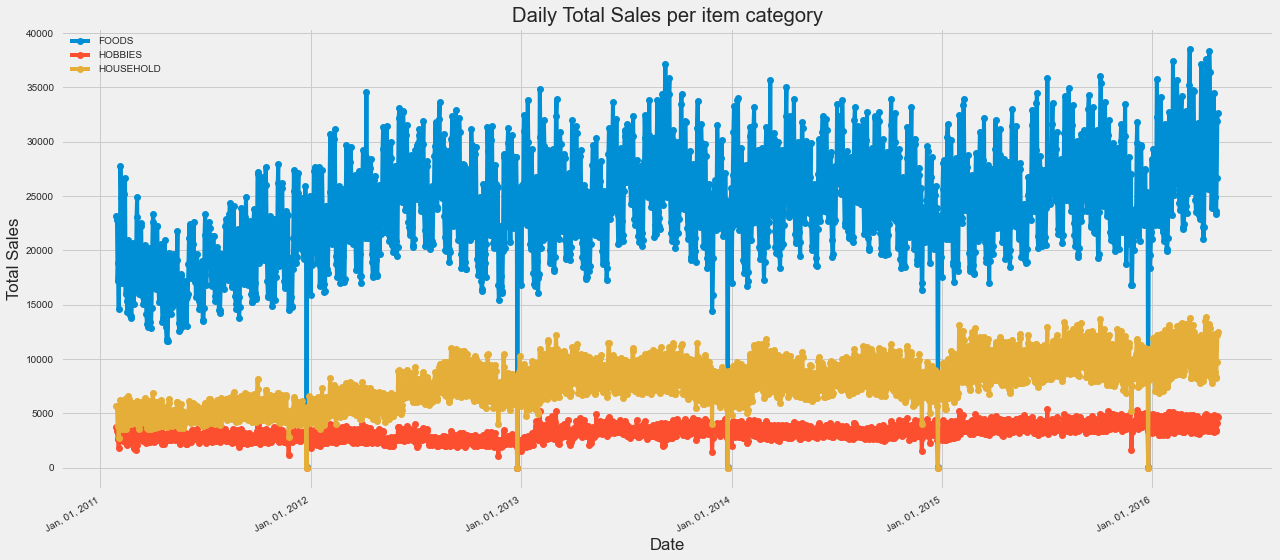

In [32]:
""" Here we get the daily sales for each product category and plot the daily sales individually for each category"""
for i in range(len(cat_ky)):
    df = sales_df.iloc[sales_cat_grp_idx[i]].loc[:,'d_1':'d_1913'].aggregate(['sum']).T.reset_index()
    df.rename(columns={'sum':'Total_Sales','index':'d'}, inplace=True)
    df = df.merge(calendar_df,on='d',how='left')
    df = df[['date','Total_Sales']]
    df['date'] = pd.to_datetime(df['date'])
    item_dates = df['date']
    item_totalSales = df['Total_Sales']
    plt.plot_date(item_dates,item_totalSales,linestyle='solid',label=cat_ky[i])
    plt.gcf().autofmt_xdate()
    date_format = mat_dates.DateFormatter('%b, %d, %Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gcf().set_size_inches(18, 8)
plt.title('Daily Total Sales per item category')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# Weekly seasonality pattern per item category for each state

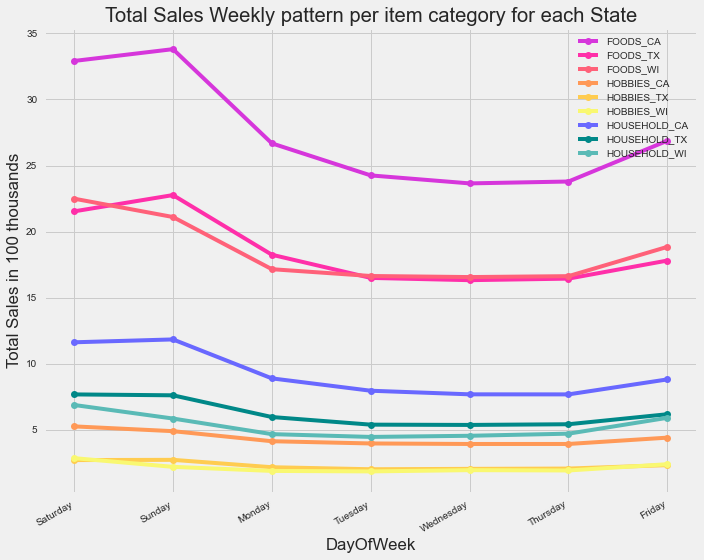

In [33]:
"""Group by cat_id and state_id for the sales proportion for the weekly seasonality pattern"""
percat_state_grp = sales_df.groupby(['cat_id','state_id'])
grp_ky = list(percat_state_grp.groups.keys())
grp_idx = list(percat_state_grp.groups.values())

#reference: https://stackoverflow.com/questions/62166396/how-to-scale-histogram-y-axis-in-million-in-matplotlib
def lblFormat(n, pos):
    return str(int(n / (1e5)))
lblFormatter = FuncFormatter(lblFormat)
labels = [str(x[0])+'_'+ str(x[1]) for x in grp_ky]

hex_color = ['#D636DB','#FF2FA9','#FF6179','#FF9957','#FFCC50','#F9F871','#6968FF','#008888','#5ABAB6']
color = iter(hex_color)

"""Here we get weekly seasonality pattern and plot weekly sales for each category_state combination"""
for i in range(len(grp_ky)):
    ca_agg_df = sales_df.iloc[grp_idx[i]].loc[:,'d_1':'d_1913'].aggregate(['sum']).T.reset_index()
    ca_agg_df.rename(columns={'sum':'Total_Sales','index':'d'}, inplace=True)
    ca_agg_df = ca_agg_df.merge(calendar_df,on='d',how='left')
    ca_agg_df = ca_agg_df[['date','Total_Sales']]
    ca_agg_df['date'] = pd.to_datetime(ca_agg_df['date'])
    ca_agg_df['day_name']=ca_agg_df['date'].dt.day_name()
    ca_agg_df_gpwd = ca_agg_df.groupby('day_name').agg({'Total_Sales':'sum'}).reset_index()

    #reference: https://stackoverflow.com/questions/40816144/pandas-series-sort-by-month-index
    day_name_order = list(ca_agg_df['date'].dt.day_name().unique())
    ca_agg_df_gpwd.index = pd.CategoricalIndex(ca_agg_df_gpwd.day_name, categories=day_name_order, ordered=True)
    ca_agg_df_gpwd = ca_agg_df_gpwd.sort_index()
    ca_agg_df_gpwd.reset_index(drop=True,inplace=True)
    week_days = ca_agg_df_gpwd['day_name']
    item_totalSales = ca_agg_df_gpwd['Total_Sales']
    plt.plot_date(week_days,item_totalSales,linestyle='solid',label=labels[i],color=next(color))
    plt.gcf().autofmt_xdate()
    plt.gcf().set_size_inches(10, 8)
    plt.gca().yaxis.set_major_formatter(lblFormatter)

plt.title('Total Sales Weekly pattern per item category for each State')
plt.legend(loc = 'upper right')
plt.xlabel('DayOfWeek')
plt.ylabel('Total Sales in '+ str(int(1e2)) + ' thousands')
plt.tight_layout()
plt.show()


# Monthly sales pattern per item category for each state

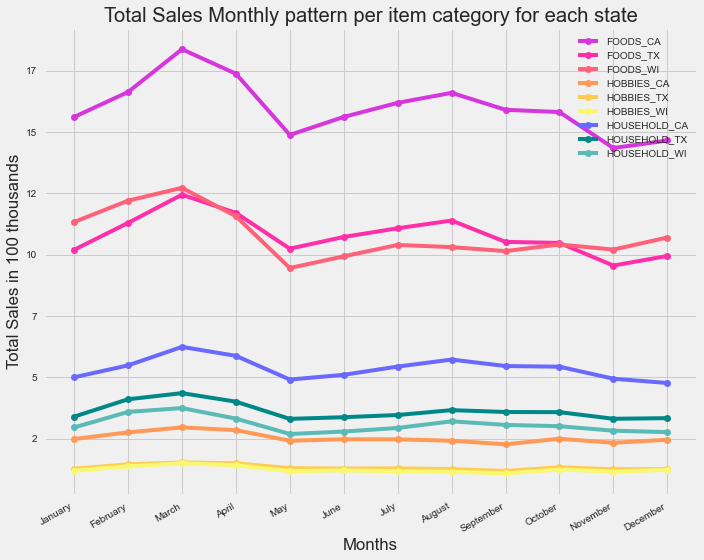

In [34]:
"""Here we get monthly seasonality pattern and plot monthly sales for each category_state combination"""

hex_color = ['#D636DB','#FF2FA9','#FF6179','#FF9957','#FFCC50','#F9F871','#6968FF','#008888','#5ABAB6']
color = iter(hex_color)

for i in range(len(grp_ky)):
    ca_agg_df = sales_df.iloc[grp_idx[i]].loc[:,'d_1':'d_1913'].aggregate(['sum']).T.reset_index()
    ca_agg_df.rename(columns={'sum':'Total_Sales','index':'d'}, inplace=True)
    ca_agg_df = ca_agg_df.merge(calendar_df,on='d',how='left')
    ca_agg_df = ca_agg_df[['date','Total_Sales']]
    ca_agg_df['date'] = pd.to_datetime(ca_agg_df['date'])
    ca_agg_df['month']=ca_agg_df['date'].dt.month_name()
    ca_agg_df_gpm = ca_agg_df.groupby('month').agg({'Total_Sales':'sum'}).reset_index()

    #reference: https://stackoverflow.com/questions/40816144/pandas-series-sort-by-month-index
    month_name_order = list(ca_agg_df['date'].dt.month_name().unique())
    ca_agg_df_gpm.index = pd.CategoricalIndex(ca_agg_df_gpm.month, categories=month_name_order, ordered=True)
    ca_agg_df_gpm = ca_agg_df_gpm.sort_index()
    ca_agg_df_gpm.reset_index(drop=True,inplace=True)
    month_names = ca_agg_df_gpm['month']
    item_totalSales = ca_agg_df_gpm['Total_Sales']
    plt.plot_date(month_names,item_totalSales,linestyle='solid',label=labels[i],color=next(color))
    plt.gcf().autofmt_xdate()
    plt.gcf().set_size_inches(10, 8)
    plt.gca().yaxis.set_major_formatter(lblFormatter)

plt.title('Total Sales Monthly pattern per item category for each state')
plt.legend(loc = 'upper right')
plt.xlabel('Months')
plt.ylabel('Total Sales in '+ str(int(1e2)) + ' thousands')
plt.tight_layout()
plt.show()

# Daily sales pattern for sample of individual products from different stores

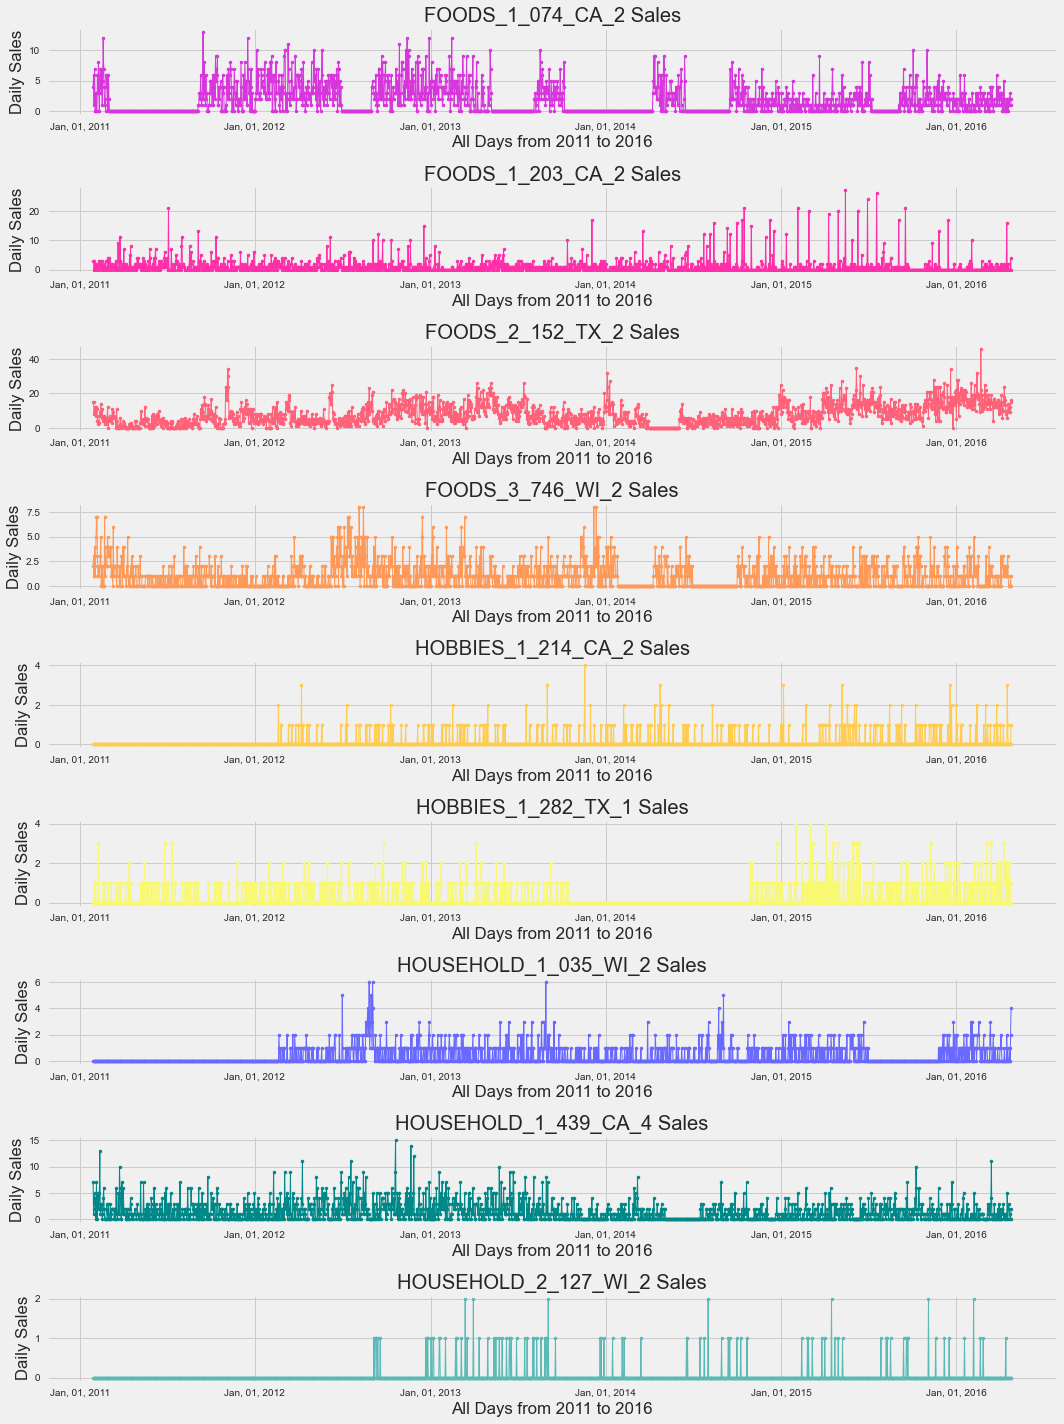

In [35]:
""" Here we are chosing sample of products and observing their daily sales pattern"""
np.random.seed(28)
#https://stackoverflow.com/questions/15772009/shuffling-permutating-a-dataframe-in-pandas
sample_sales_df = sales_df.reindex(np.random.permutation(sales_df.index)).iloc[:9]
keep_cols = ['id','item_id','dept_id','cat_id','store_id','state_id']
sample_sales_df = pd.melt(sample_sales_df,id_vars=keep_cols,var_name='d',value_name = 'sales')
sample_sales_df = sample_sales_df.merge(calendar_df,on='d',how='left')
sample_sales_df_grp = sample_sales_df.groupby('id')
sample_sales_df_idx = list(sample_sales_df_grp.groups.values())
id_ky = list(sample_sales_df_grp.groups.keys())
id_ky = [x.replace('_validation','') for x in id_ky]

df = sample_sales_df.iloc[sample_sales_df_idx[0]]
df['date'] = pd.to_datetime(df['date'])
s_dates = df['date']
date_format = mat_dates.DateFormatter('%b, %d, %Y')
N = len(id_ky)

hex_color = ['#D636DB','#FF2FA9','#FF6179','#FF9957','#FFCC50','#F9F871','#6968FF','#008888','#5ABAB6']
color = iter(hex_color)

"""Daily sales pattern of sample of products"""
fig = plt.figure(figsize=(15, 20))
for i in range(N):
    ax = fig.add_subplot(N,1,i+1)
    df1 = sample_sales_df.iloc[sample_sales_df_idx[i]]
    plt.plot_date(s_dates,df1['sales'],linestyle='solid',linewidth=1,marker='.',color=next(color))
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gca().set_title(id_ky[i]+ ' Sales')
    plt.gca().set_xlabel('All Days from 2011 to 2016')
    plt.gca().set_ylabel('Daily Sales')
plt.tight_layout()
plt.show()

# Price distribution for each store

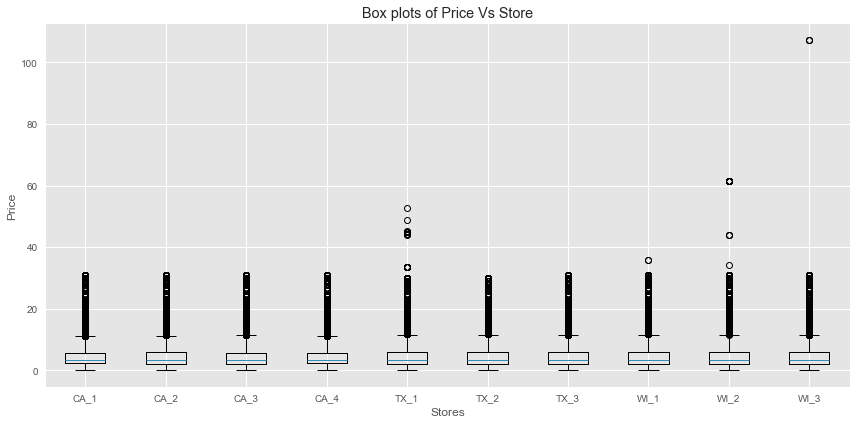

In [36]:
"""Here we get the price of items for each store individually"""
price_grp = prices_df.groupby('store_id')
price_lst_idx = list(price_grp.groups.values())
price_str_ky = list(price_grp.groups.keys())

"""Box plot of price of items per store """
price_bx = []
for i in range(len(price_str_ky)):
    price_bx.append(prices_df.iloc[price_lst_idx[i]]['sell_price'].values)
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.boxplot ([x for x in price_bx],labels=price_str_ky)
plt.title('Box plots of Price Vs Store')
plt.xlabel('Stores')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# Missing Value Analysis
## Calender data

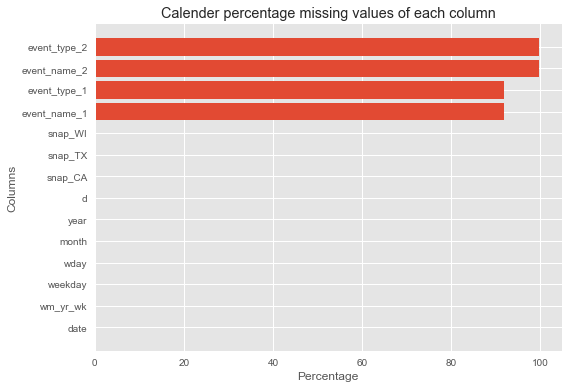

In [37]:
calendar_series = (calendar_df.isnull().sum()/len(calendar_df))*100
percent_miss_val = np.asarray(calendar_series.values)[np.argsort(np.asarray(calendar_series.values))]
calendar_cols = np.asarray(calendar_series.index)[np.argsort(np.asarray(calendar_series.values))]
plt.barh(calendar_cols,percent_miss_val)
plt.title('Calender percentage missing values of each column')
plt.xlabel('Percentage')
plt.ylabel('Columns')
plt.tight_layout()
plt.show()


# Sales data

In [38]:
sales_series = (sales_df.loc[:,'id':'state_id'].isnull().sum()/len(sales_df))*100
sales_series

id         0.00
item_id    0.00
dept_id    0.00
cat_id     0.00
store_id   0.00
state_id   0.00
dtype: float64

In [39]:
price_series = (prices_df.isnull().sum()/len(prices_df))*100
price_series

store_id     0.00
item_id      0.00
wm_yr_wk     0.00
sell_price   0.00
dtype: float64

# Percentage of items with missing prices per store for each state

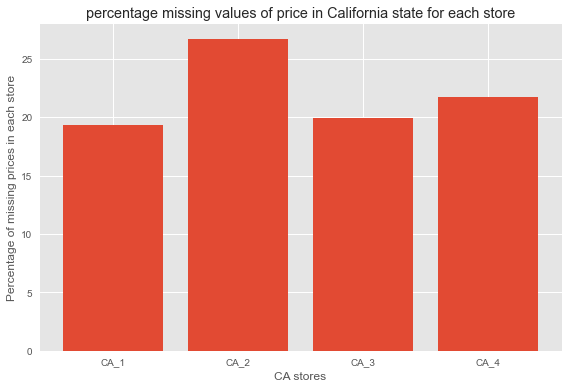

In [40]:
CA_stores = []
CA_missing_prices = []
CA_sales = sales_df.loc[sales_df['state_id']=='CA']
CA_sales = pd.melt(CA_sales,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],var_name='d',value_name='sales')
CA_sales = CA_sales.merge(calendar_df,on='d',how='left')
CA_sales = CA_sales.merge(prices_df,how='left',on=['store_id','item_id','wm_yr_wk'])
CA_sales_grp = CA_sales.groupby('store_id')

for key,val in CA_sales_grp.groups.items():
    CA_stores.append(key)
    CA_missing_prices.append(CA_sales.iloc[val]['sell_price'].isnull().sum()*100/len(CA_sales.iloc[val]))

plt.bar(CA_stores,CA_missing_prices)
plt.title('percentage missing values of price in California state for each store')
plt.xlabel('CA stores')
plt.ylabel('Percentage of missing prices in each store')
plt.tight_layout()
plt.show()


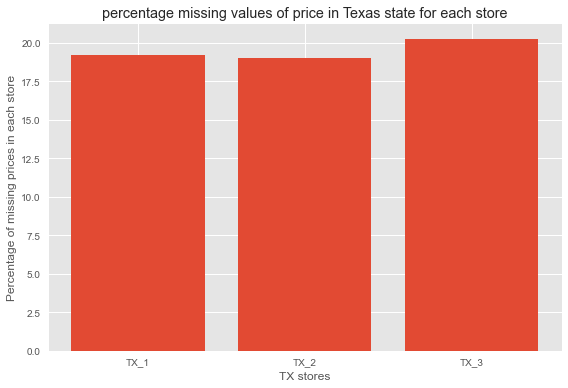

In [41]:
TX_stores = []
TX_missing_prices = []
TX_sales = sales_df.loc[sales_df['state_id']=='TX']
TX_sales = pd.melt(TX_sales,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],var_name='d',value_name='sales')
TX_sales = TX_sales.merge(calendar_df,on='d',how='left')
TX_sales = TX_sales.merge(prices_df,how='left',on=['store_id',	'item_id',	'wm_yr_wk'])
TX_sales_grp = TX_sales.groupby('store_id')

for key,val in TX_sales_grp.groups.items():
    TX_stores.append(key)
    TX_missing_prices.append(TX_sales.iloc[val]['sell_price'].isnull().sum()*100/len(TX_sales.iloc[val]))

plt.bar(TX_stores,TX_missing_prices)
plt.title('percentage missing values of price in Texas state for each store')
plt.xlabel('TX stores')
plt.ylabel('Percentage of missing prices in each store')
plt.tight_layout()
plt.show()

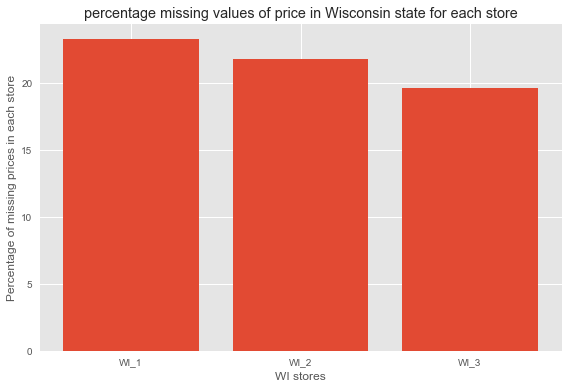

In [42]:
WI_stores = []
WI_missing_prices = []
WI_sales = sales_df.loc[sales_df['state_id']=='WI']
WI_sales = pd.melt(WI_sales,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],var_name='d',value_name='sales')
WI_sales = WI_sales.merge(calendar_df,on='d',how='left')
WI_sales = WI_sales.merge(prices_df,how='left',on=['store_id',	'item_id',	'wm_yr_wk'])
WI_sales_grp = WI_sales.groupby('store_id')

for key,val in WI_sales_grp.groups.items():
    WI_stores.append(key)
    WI_missing_prices.append(WI_sales.iloc[val]['sell_price'].isnull().sum()*100/len(WI_sales.iloc[val]))

plt.bar(WI_stores,WI_missing_prices)
plt.title('percentage missing values of price in Wisconsin state for each store')
plt.xlabel('WI stores')
plt.ylabel('Percentage of missing prices in each store')
plt.tight_layout()
plt.show()


# Impact of events on sales

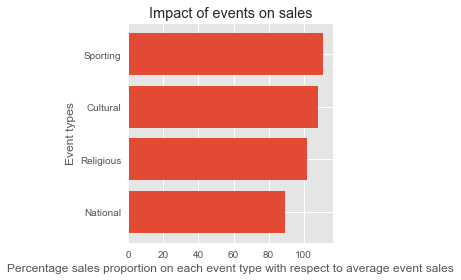

In [43]:
""" Here we get the percentage sales proportion on each event type with respect to average sales on event days """
calendar_df_sliced = calendar_df[(calendar_df['date'] >= '2014-01-01') & (calendar_df['date'] <= '2016-04-24')]
eff_df = pd.melt(sales_df, id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],
                var_name='d',value_name='sales')
eff_df = eff_df.merge(calendar_df_sliced,on='d',how='right')

event_df = eff_df.loc[eff_df[['event_name_1']].notnull().any(axis=1)]
non_event_df = eff_df.loc[eff_df[['event_name_1']].isnull().all(axis=1)]

events_lst = []
event_sales = []
num_eve = 0
temp = 0
events_gp = event_df.groupby('event_type_1')
for key,val in events_gp.groups.items():
    events_lst.append(key)
    temp = len(calendar_df_sliced[calendar_df_sliced['event_type_1'] == key])
    num_eve += temp
    event_sales.append(event_df.loc[val]['sales'].sum()/(temp))

total_event_sales = (event_df['sales'].sum())/(num_eve)
event_sales = [round((x/total_event_sales)*100,2) for x in event_sales]
events_lst = np.asarray(events_lst)[np.argsort(np.asarray(event_sales))]
event_sales = np.asarray(event_sales)[np.argsort(np.asarray(event_sales))]
plt.figure(figsize=(5,4))
plt.barh(events_lst,event_sales)
plt.title('Impact of events on sales')
plt.xlabel('Percentage sales proportion on each event type with respect to average event sales')
plt.ylabel('Event types')
plt.tight_layout()
plt.show()

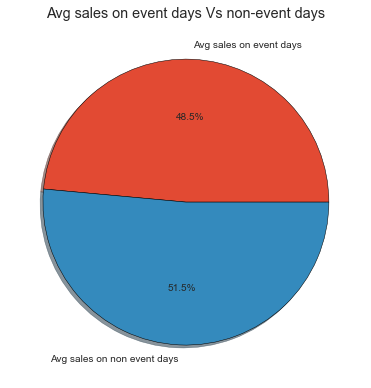

In [44]:
""" Here we get the average sales proportion on event days and non-event days """
non_event_sales = int(non_event_df['sales'].sum())
days_noneve = len(calendar_df_sliced) - calendar_df_sliced['event_type_1'].count()
days_eve = calendar_df_sliced['event_type_1'].count()
avg_noneve_sales = non_event_sales/days_noneve
avg_eve_sales = total_event_sales
total_rel_sales = avg_noneve_sales + avg_eve_sales
avg_noneve_sales = round((avg_noneve_sales/total_rel_sales)*100,2)
avg_eve_sales = round((avg_eve_sales/total_rel_sales)*100,2)

plt.pie([avg_eve_sales,avg_noneve_sales],labels=['Avg sales on event days','Avg sales on non event days'],shadow=True,
        autopct = '%1.1f%%', wedgeprops={'edgecolor':'black'})
plt.title('Avg sales on event days Vs non-event days')
plt.tight_layout()
plt.show()

# Top products which highest sales

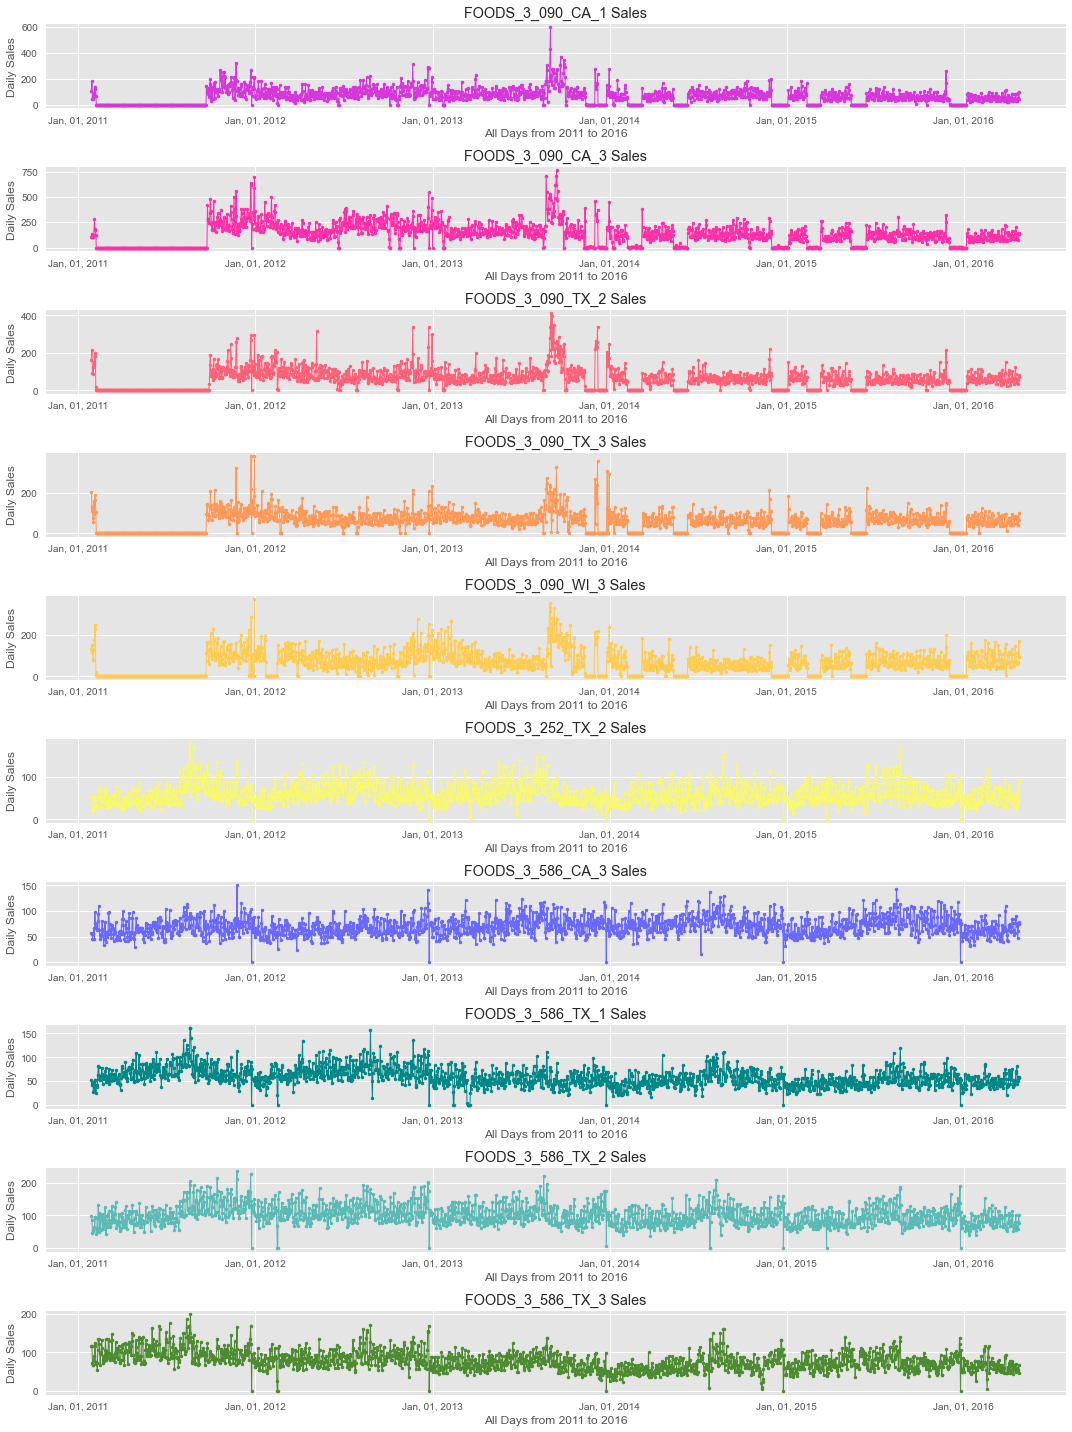

In [45]:
""" Here we get top 10 products with highest sales and plot the sales of these products """
top10_sales = sales_df.loc[:,'d_1':'d_1913'].sum(axis=1).sort_values(ascending=False).iloc[:10]
top10_sales_idx = list(top10_sales.index)
top10_sales_df = sales_df.loc[top10_sales_idx]
top10_sales_df = pd.melt(top10_sales_df, id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],
                         var_name='d',value_name='sales')
top10_sales_df = top10_sales_df.merge(calendar_df,on='d',how='left')
top10_sales_df_grp = top10_sales_df.groupby('id')
top10_sales_df_idx = list(top10_sales_df_grp.groups.values())
top_prod = list(top10_sales_df_grp.groups.keys())
top_prod = [x.replace('_validation','') for x in top_prod]

df = top10_sales_df.iloc[top10_sales_df_idx[0]]
df['date'] = pd.to_datetime(df['date'])
top_dates = df['date']
date_format = mat_dates.DateFormatter('%b, %d, %Y')
N = len(top_prod)

hex_color = ['#D636DB','#FF2FA9','#FF6179','#FF9957','#FFCC50','#F9F871','#6968FF','#008888','#5ABAB6','#4D8B31']
color = iter(hex_color)

"""Daily sales pattern of top sales products"""
fig = plt.figure(figsize=(15, 20))
for i in range(N):
    ax = fig.add_subplot(N,1,i+1)
    df1 = top10_sales_df.iloc[top10_sales_df_idx[i]]
    ax.plot_date(top_dates,df1['sales'],linestyle='solid',linewidth=1,marker='.',color=next(color))
    ax.xaxis.set_major_formatter(date_format)
    ax.set_title(top_prod[i]+ ' Sales')
    ax.set_xlabel('All Days from 2011 to 2016')
    ax.set_ylabel('Daily Sales')
plt.tight_layout()
plt.show()